<h1>Visualizing Data distribution</h1>

In [1]:
import pandas as pd

In [3]:
#read gathered data: post + category + article's content
data=pd.read_csv('dataset_linkedinposts.csv',error_bad_lines=False)
data.head()

,post,category,article_content
0,"IKOMOBI\n \n \n\n \n 1,431...",digitalfactory,no
1,Status is offline\n \n\n\n\n\n \n \n\...,digitalfactory,no
2,Status is offline\n \n\n\n\n\n \n \n\...,digitalfactory,<html><head>\n <!-- Google Tag Manager ...
3,Status is offline\n \n\n\n\n\n \n \n\...,digitalfactory,no
4,Status is offline\n \n\n\n\n\n \n \n\...,digitalfactory,"<html lang=""fr""><head>\n\t<title>Coca-Cola acc..."


In [10]:
data.iloc[:,10:18]

""
0
1
2
3
4
5
6
7
8
9


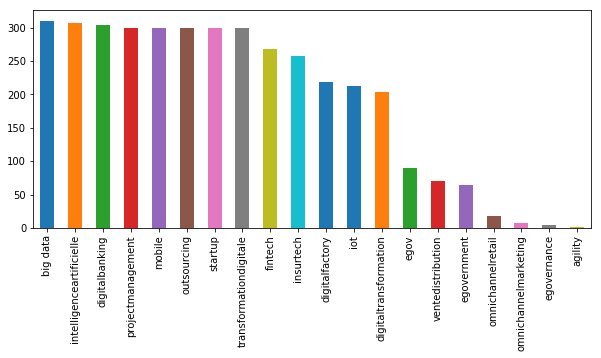

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
data.category.value_counts().plot(kind='bar');

<h1>Clean Dataset</h1>
<ul>
    <li>Parse lxml to get the relevant data (in div, p, meta:description)</li>
    <li>transform data to lowercase</li>
    <li>Remove punctuations, symbols and hashtag#</li>
    <li>No Stemming: we have more than one language(fr, eng, ar ...)</li>
    <li>Remove eng&fr stopwords</li>
</ul>

In [ ]:
'''
    BeautifulSoup to Parse lxml(to remove div containing scripts) to extract divs paragraphs and description
'''
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import re
stop_words = set(stopwords.words("english")).union(set(stopwords.words("french")))

In [ ]:
nb_posts=data.shape[0]
posts=[]
for m in range(nb_posts):
    print(m)
    text=data.article_content[m]
    clean=''
    if url!='no':
        try:
            soup = BeautifulSoup(text, 'lxml')
        except:
            article_content_tokenized_sentences.append('no')
            continue
        [s.extract() for s in soup('script')]
        #get the description of the article
        clean=soup.find('meta',attrs={'name':"description"})['content']
        #add contents in divs
        clean+=' '+' '.join([ i.text for i in soup.find_all('div')])
        #add contents in paragraphs
        clean+=' '+' '.join([ i.text for i in soup.find_all('p')])

        #drop irrelevant content which exists in the following sections: footer, header, nav
        try:
            for i in soup.find('footer').text.split():
                clean=clean.replace(i,'',1)
        except:
            pass
        try:
            for i in soup.find('header').text.split():
                clean=clean.replace(i,'',1)
        except:
            pass
        try:
            for i in soup.find('nav').text.split():
                clean=clean.replace(i,'',1)
        except:
            pass
                    
    #add post's content
    s1=data.post[m]
    s1=s1.lower()
    s2='this post is offensive or the account is hacked\n'
    s3='like\n'
    clean+=' '+s1[s1.index(s2)+len(s2):s1.index(s3)]
    #change to lowercase
    clean=clean.lower()
    #remove hashtag#
    clean=re.sub('(hashtag|#|_)',' ',clean)
    #remove punctuations and symbols
    clean=re.sub('(\\d|\\W)+',' ',clean)
    #remove stopwords english and french
    posts.append(' '.join([word for word in clean.split(' ') if word not in stop_words ]))
    
#X: cleaned post
data['X']=posts

In [ ]:
#data labeling 
tags={'big data':1,
      'intelligenceartificielle':2,
      'agility':3,
       'egov':4,'egovernment':4,'egovernance':4,
      'digitalbanking':5,
      'digitalfactory':6,
      'outsourcing':7,
      'mobile':8,
      'omnichannelmarketing':9,'omnichannelretail':9,
      'iot':10,
      'projectmanagement':11,
      'startup':12,
      'transformationdigitale':13,'digitaltransformation':13,
      'fintech':14,'insurtech':14,
      'ventedistribution':15
}
labels=[]
for cat in data.category:
    labels.append(tags[cat])
data['label']=labels
#label for each model's category 

data['y1']=[1 if i==1 else 0 for i in data.label ]
data['y2']=[1 if i==2 else 0 for i in data.label ]
data['y3']=[1 if i==3 else 0 for i in data.label ]
data['y4']=[1 if i==4 else 0 for i in data.label ]
data['y5']=[1 if i==5 else 0 for i in data.label ]
data['y6']=[1 if i==6 else 0 for i in data.label ]
data['y7']=[1 if i==7 else 0 for i in data.label ]
data['y8']=[1 if i==8 else 0 for i in data.label ]
data['y9']=[1 if i==9 else 0 for i in data.label ]
data['y10']=[1 if i==10 else 0 for i in data.label ]
data['y11']=[1 if i==11 else 0 for i in data.label ]
data['y12']=[1 if i==12 else 0 for i in data.label ]
data['y13']=[1 if i==13 else 0 for i in data.label ]
data['y14']=[1 if i==14 else 0 for i in data.label ]
data['y15']=[1 if i==15 else 0 for i in data.label ]

In [ ]:
#save cleaned+labeled data in .csv format
data=[['X','y1','y2','y3','y4','y5','y6','y7','y8','y9','y10','y11','y12','y13','y14','y15']]
data.to_csv('cleaned_dataset.csv',index=False)

In [7]:
data.head()

,X,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15
0,comment simplifier suivi actifs financiers déc...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,dear linkers chester consulting conducting stu...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,inscrivez newsletter recevez chaque jour toute...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,discover digital factory talan digitalfactory ...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,compris utilise cookies af air amélier expérie...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


<h1>Data Visualization By category</h1>

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
sns.set(rc={'figure.figsize':(30,10)})


#Most frequently occuring 2-grams
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

<h4>Top Words for BigData</h4>

[Text(0, 0, 'les'),
 Text(0, 0, 'data'),
 Text(0, 0, 'ob'),
 Text(0, 0, 'px'),
 Text(0, 0, 'données'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'widget'),
 Text(0, 0, 'ob widget'),
 Text(0, 0, 'widget ob'),
 Text(0, 0, 'big'),
 Text(0, 0, 'intelligence'),
 Text(0, 0, 'big data'),
 Text(0, 0, 'services'),
 Text(0, 0, 'cloud'),
 Text(0, 0, 'font'),
 Text(0, 0, 'px px'),
 Text(0, 0, 'rec'),
 Text(0, 0, 'sfd'),
 Text(0, 0, 'stp'),
 Text(0, 0, 'sfd stp'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'stp ob'),
 Text(0, 0, 'ia'),
 Text(0, 0, 'height'),
 Text(0, 0, 'width'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'être'),
 Text(0, 0, 'content'),
 Text(0, 0, 'entreprises'),
 Text(0, 0, 'ar'),
 Text(0, 0, 'clients'),
 Text(0, 0, 'left'),
 Text(0, 0, 'ar ob'),
 Text(0, 0, 'machine'),
 Text(0, 0, 'ob rec'),
 Text(0, 0, 'top'),
 Text(0, 0, 'com'),
 Text(0, 0, 'https'),
 Text(0, 0, 'color'),
 Text(0, 0, 'analytics'),
 Text(0, 0, 'information'),
 Text(0, 0, 'google'),
 Text(0, 0, 'business'),
 Text(0, 0, 'position')

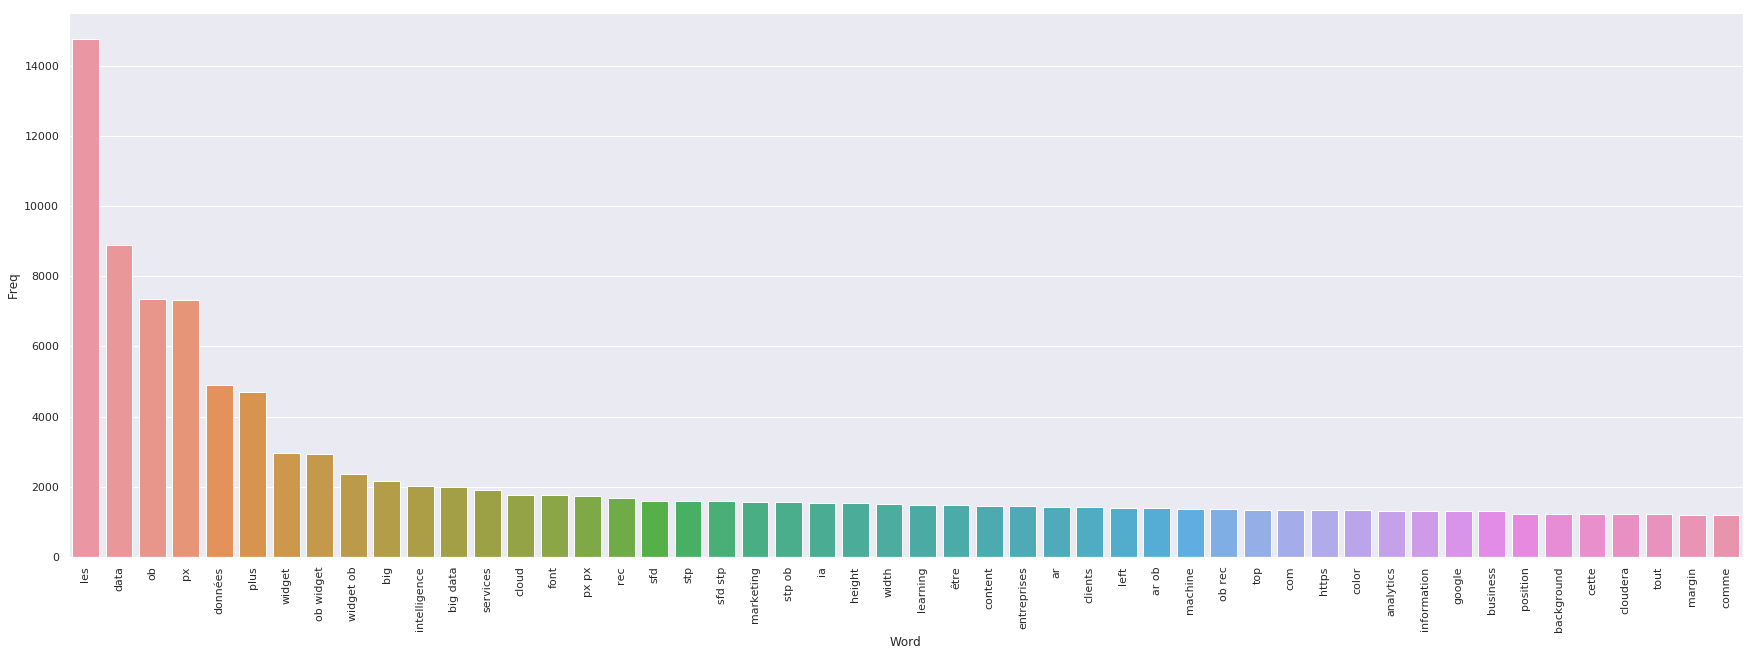

In [9]:
Bigdata=data.X[data.y1==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for AI</h4>

[Text(0, 0, 'px'),
 Text(0, 0, 'les'),
 Text(0, 0, 'ob'),
 Text(0, 0, 'color'),
 Text(0, 0, 'intelligence'),
 Text(0, 0, 'artificielle'),
 Text(0, 0, 'widget'),
 Text(0, 0, 'ob widget'),
 Text(0, 0, 'data'),
 Text(0, 0, 'intelligence artificielle'),
 Text(0, 0, 'height'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'border'),
 Text(0, 0, 'ia'),
 Text(0, 0, 'background'),
 Text(0, 0, 'rec'),
 Text(0, 0, 'widget ob'),
 Text(0, 0, 'left'),
 Text(0, 0, 'font'),
 Text(0, 0, 'width'),
 Text(0, 0, 'text'),
 Text(0, 0, 'margin'),
 Text(0, 0, 'position'),
 Text(0, 0, 'top'),
 Text(0, 0, 'ob rec'),
 Text(0, 0, 'box'),
 Text(0, 0, 'size'),
 Text(0, 0, 'px px'),
 Text(0, 0, 'normal'),
 Text(0, 0, 'padding'),
 Text(0, 0, 'display'),
 Text(0, 0, 'rgba'),
 Text(0, 0, 'state'),
 Text(0, 0, 'container'),
 Text(0, 0, 'data state'),
 Text(0, 0, 'ecom'),
 Text(0, 0, 'right'),
 Text(0, 0, 'important'),
 Text(0, 0, 'height px'),
 Text(0, 0, 'width px'),
 Text(0, 0, 'align'),
 Text(0, 0, 'webkit'),
 Text(0, 0, 'données

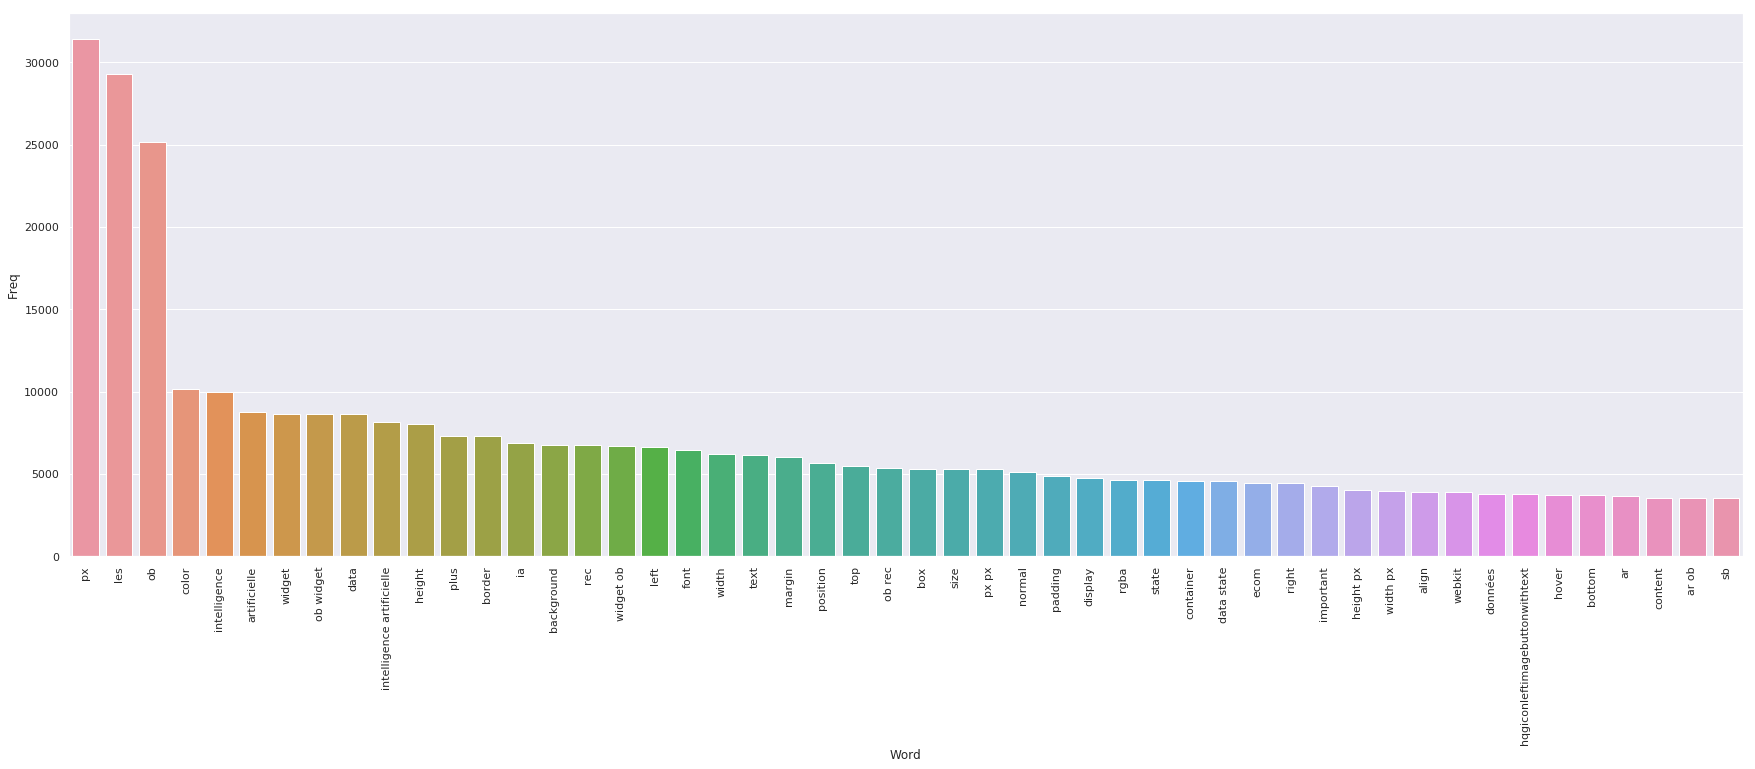

In [10]:
Bigdata=data.X[data.y2==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for agility</h4>

[Text(0, 0, 'birdie'),
 Text(0, 0, 'nantes'),
 Text(0, 0, 'hipay'),
 Text(0, 0, 'session'),
 Text(0, 0, 'serious'),
 Text(0, 0, 'game'),
 Text(0, 0, 'serious game'),
 Text(0, 0, 'birdie birdie'),
 Text(0, 0, 'birdie nantes'),
 Text(0, 0, 'nantes hipay'),
 Text(0, 0, 'chez'),
 Text(0, 0, 'merci'),
 Text(0, 0, 'tous'),
 Text(0, 0, 'les'),
 Text(0, 0, 'participants'),
 Text(0, 0, 'bonne'),
 Text(0, 0, 'humeur'),
 Text(0, 0, 'implication'),
 Text(0, 0, 'démarche'),
 Text(0, 0, 'office'),
 Text(0, 0, 'thanks'),
 Text(0, 0, 'excellent'),
 Text(0, 0, 'mood'),
 Text(0, 0, 'involvement'),
 Text(0, 0, 'seriousgame'),
 Text(0, 0, 'jeuagile'),
 Text(0, 0, 'agility'),
 Text(0, 0, 'scrum'),
 Text(0, 0, 'see'),
 Text(0, 0, 'translation'),
 Text(0, 0, 'activate'),
 Text(0, 0, 'link'),
 Text(0, 0, 'view'),
 Text(0, 0, 'larger'),
 Text(0, 0, 'image'),
 Text(0, 0, 'session serious'),
 Text(0, 0, 'game birdie'),
 Text(0, 0, 'nantes chez'),
 Text(0, 0, 'chez hipay'),
 Text(0, 0, 'hipay merci'),
 Text(0, 0,

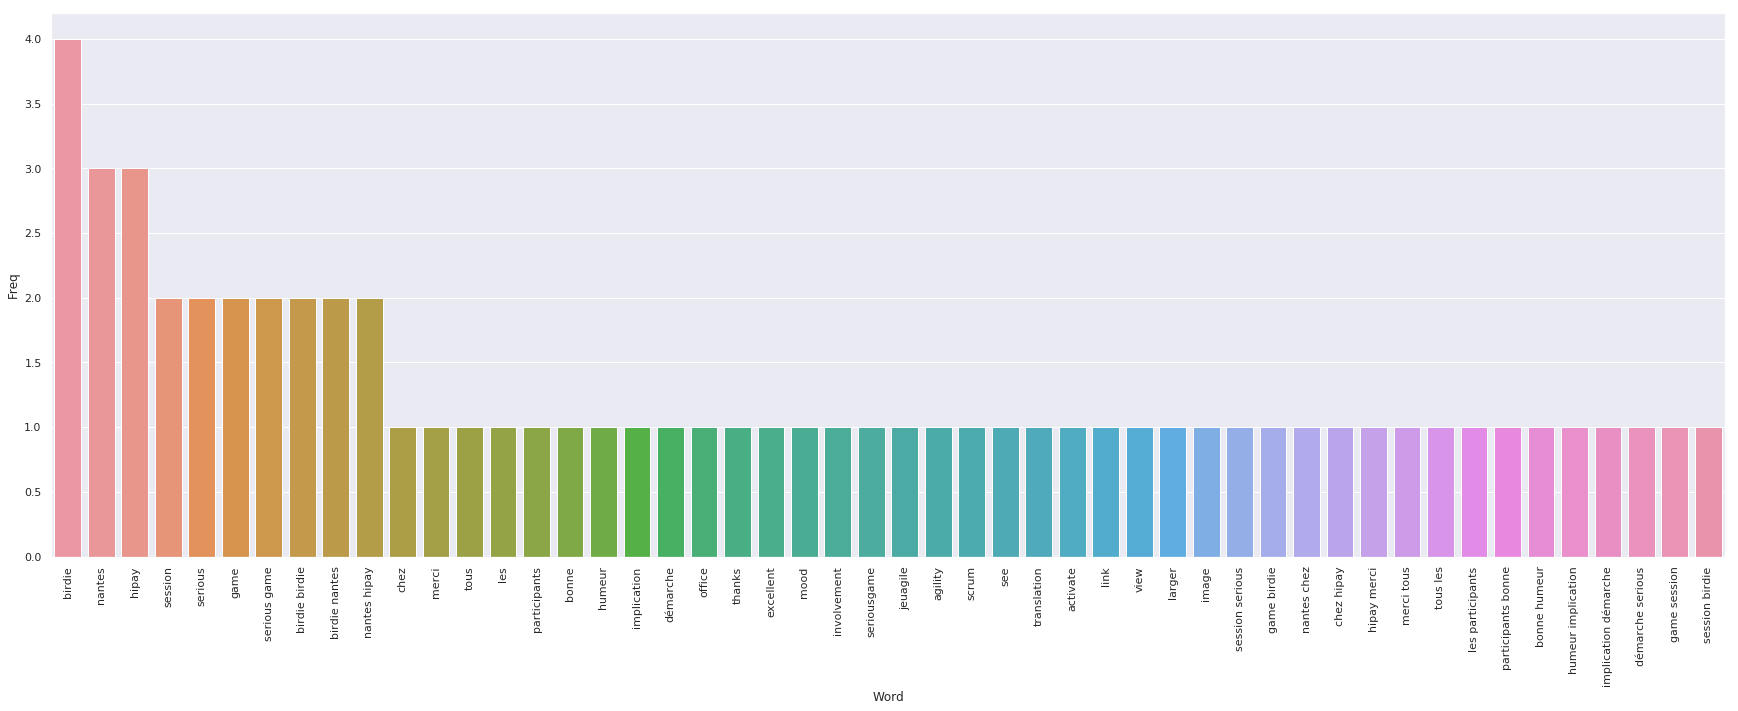

In [11]:
Bigdata=data.X[data.y3==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for egov</h4>

[Text(0, 0, 'ob'),
 Text(0, 0, 'les'),
 Text(0, 0, 'px'),
 Text(0, 0, 'widget'),
 Text(0, 0, 'ob widget'),
 Text(0, 0, 'widget ob'),
 Text(0, 0, 'sfd'),
 Text(0, 0, 'stp'),
 Text(0, 0, 'sfd stp'),
 Text(0, 0, 'stp ob'),
 Text(0, 0, 'rec'),
 Text(0, 0, 'électronique'),
 Text(0, 0, 'ob rec'),
 Text(0, 0, 'services'),
 Text(0, 0, 'identité'),
 Text(0, 0, 'height'),
 Text(0, 0, 'ar'),
 Text(0, 0, 'font'),
 Text(0, 0, 'ar ob'),
 Text(0, 0, 'container'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'background'),
 Text(0, 0, 'width'),
 Text(0, 0, 'text'),
 Text(0, 0, 'données'),
 Text(0, 0, 'logo'),
 Text(0, 0, 'top'),
 Text(0, 0, 'identité électronique'),
 Text(0, 0, 'height px'),
 Text(0, 0, 'box'),
 Text(0, 0, 'service'),
 Text(0, 0, 'px px'),
 Text(0, 0, 'color'),
 Text(0, 0, 'في'),
 Text(0, 0, 'pwc'),
 Text(0, 0, 'strip'),
 Text(0, 0, 'width px'),
 Text(0, 0, 'layout'),
 Text(0, 0, 'strip layout'),
 Text(0, 0, 'togo'),
 Text(0, 0, 'center'),
 Text(0, 0, 'layout ob'),
 Text(0, 0, 'padding'),
 Text(0

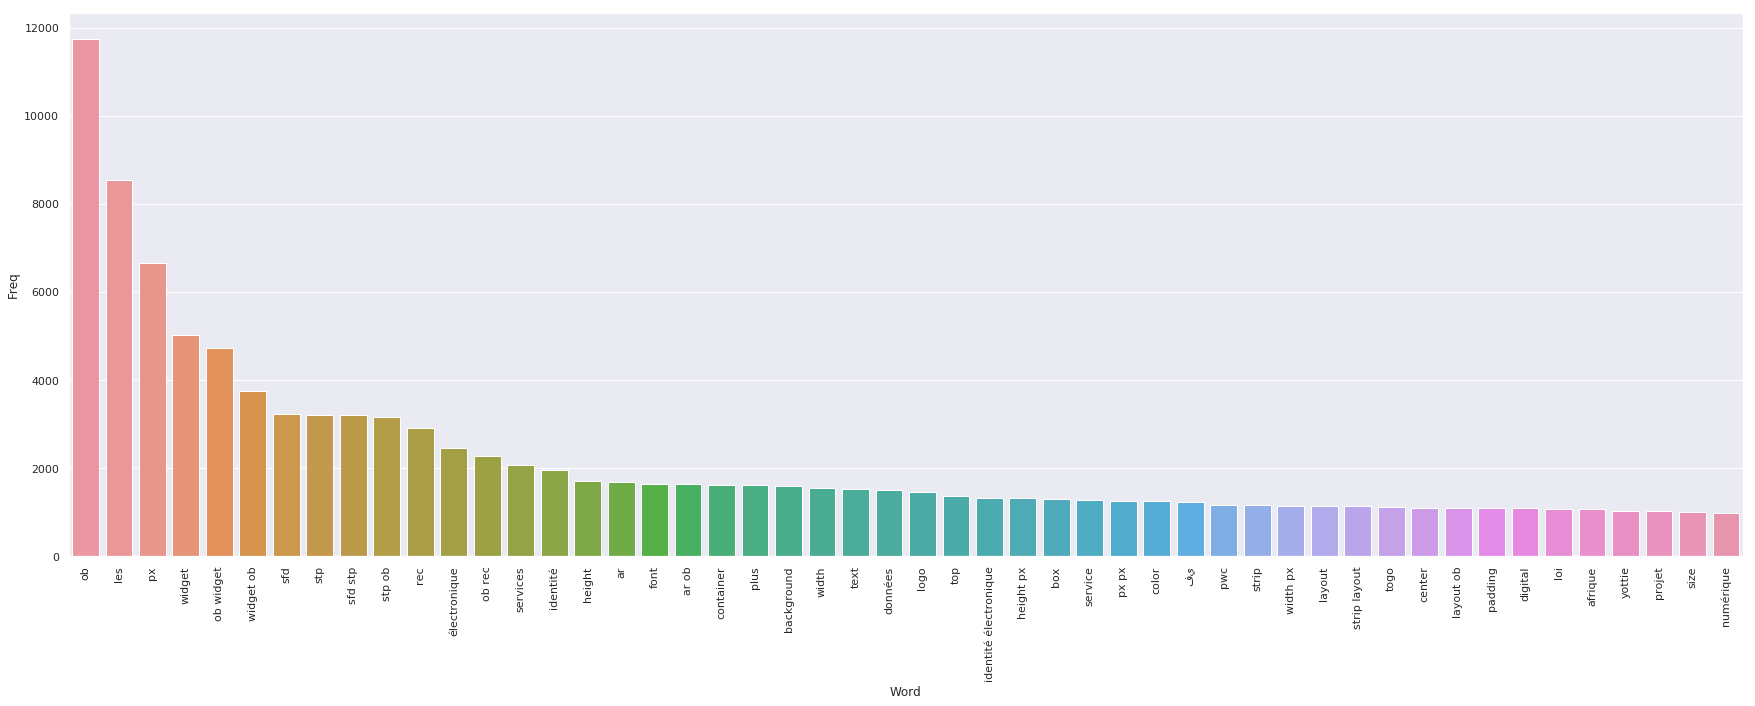

In [12]:
Bigdata=data.X[data.y4==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for digitalbanking</h4>

[Text(0, 0, 'les'),
 Text(0, 0, 'ob'),
 Text(0, 0, 'px'),
 Text(0, 0, 'widget'),
 Text(0, 0, 'ob widget'),
 Text(0, 0, 'bank'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'sfd'),
 Text(0, 0, 'stp'),
 Text(0, 0, 'sfd stp'),
 Text(0, 0, 'stp ob'),
 Text(0, 0, 'widget ob'),
 Text(0, 0, 'banking'),
 Text(0, 0, 'banque'),
 Text(0, 0, 'digital'),
 Text(0, 0, 'rec'),
 Text(0, 0, 'clients'),
 Text(0, 0, 'ob rec'),
 Text(0, 0, 'banques'),
 Text(0, 0, 'background'),
 Text(0, 0, 'color'),
 Text(0, 0, 'fintech'),
 Text(0, 0, 'pay'),
 Text(0, 0, 'top'),
 Text(0, 0, 'data'),
 Text(0, 0, 'services'),
 Text(0, 0, 'font'),
 Text(0, 0, 'box'),
 Text(0, 0, 'container'),
 Text(0, 0, 'width'),
 Text(0, 0, 'height'),
 Text(0, 0, 'bill'),
 Text(0, 0, 'logo'),
 Text(0, 0, 'text'),
 Text(0, 0, 'style'),
 Text(0, 0, 'banks'),
 Text(0, 0, 'px px'),
 Text(0, 0, 'us'),
 Text(0, 0, 'mobile'),
 Text(0, 0, 'see'),
 Text(0, 0, 'cette'),
 Text(0, 0, 'di'),
 Text(0, 0, 'left'),
 Text(0, 0, 'margin'),
 Text(0, 0, 'france'),
 Text(

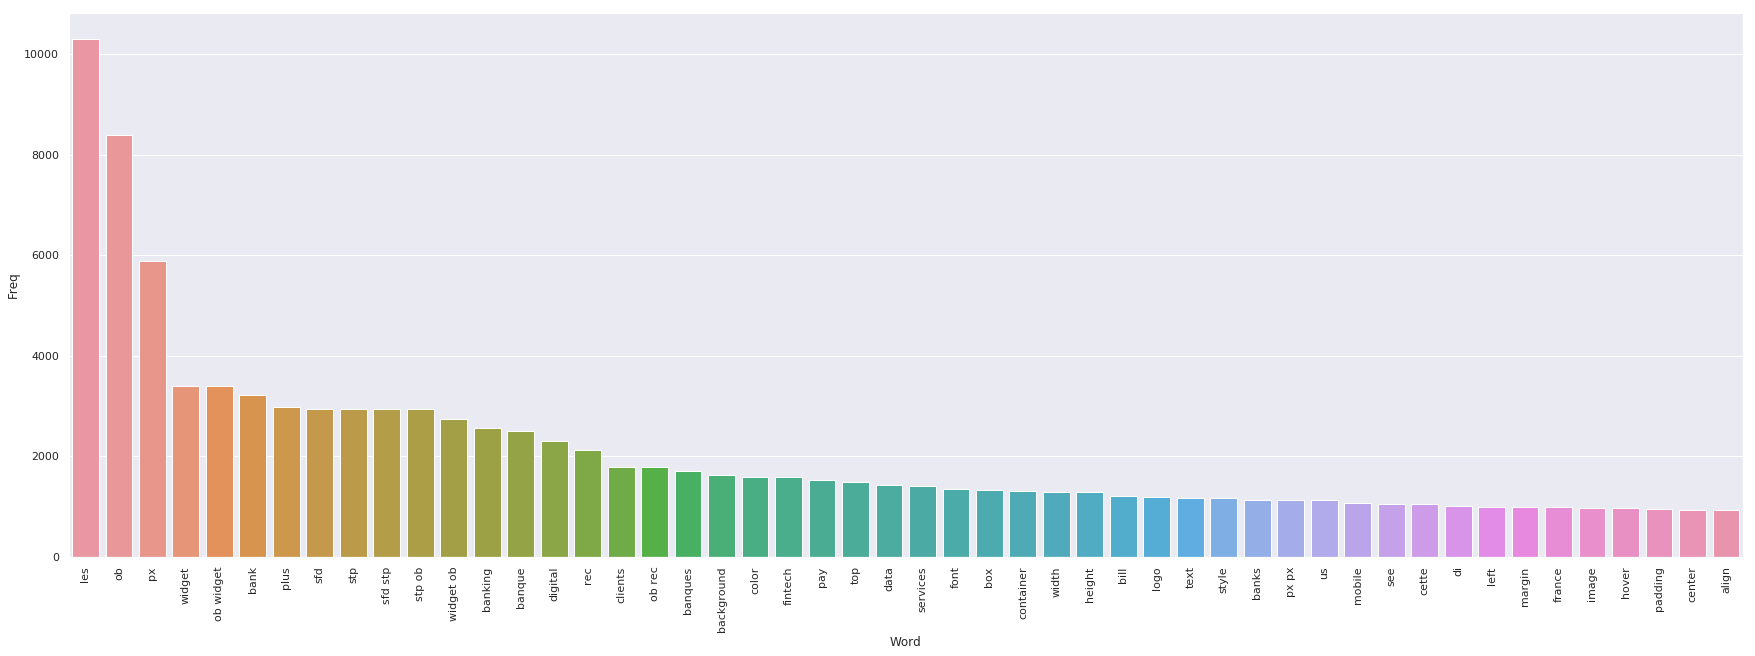

In [13]:
Bigdata=data.X[data.y5==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for digitalfactory</h4>

[Text(0, 0, 'les'),
 Text(0, 0, 'politique'),
 Text(0, 0, 'px'),
 Text(0, 0, 'confidentialité'),
 Text(0, 0, 'inc'),
 Text(0, 0, 'digital'),
 Text(0, 0, 'inc politique'),
 Text(0, 0, 'politique confidentialité'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'comp'),
 Text(0, 0, 'data'),
 Text(0, 0, 'start'),
 Text(0, 0, 'self'),
 Text(0, 0, 'factory'),
 Text(0, 0, 'media'),
 Text(0, 0, 'gmbhpolitique'),
 Text(0, 0, 'position'),
 Text(0, 0, 'digital factory'),
 Text(0, 0, 'px px'),
 Text(0, 0, 'jpi'),
 Text(0, 0, 'comp jpi'),
 Text(0, 0, 'self start'),
 Text(0, 0, 'limitedpolitique'),
 Text(0, 0, 'grid'),
 Text(0, 0, 'france'),
 Text(0, 0, 'relative'),
 Text(0, 0, 'position relative'),
 Text(0, 0, 'ltdpolitique'),
 Text(0, 0, 'entreprise'),
 Text(0, 0, 'transformation'),
 Text(0, 0, 'solutions'),
 Text(0, 0, 'comment'),
 Text(0, 0, 'entreprises'),
 Text(0, 0, 'digitale'),
 Text(0, 0, 'left'),
 Text(0, 0, 'margin'),
 Text(0, 0, 'cette'),
 Text(0, 0, 'events'),
 Text(0, 0, 'projets'),
 Text(0, 0, 'po

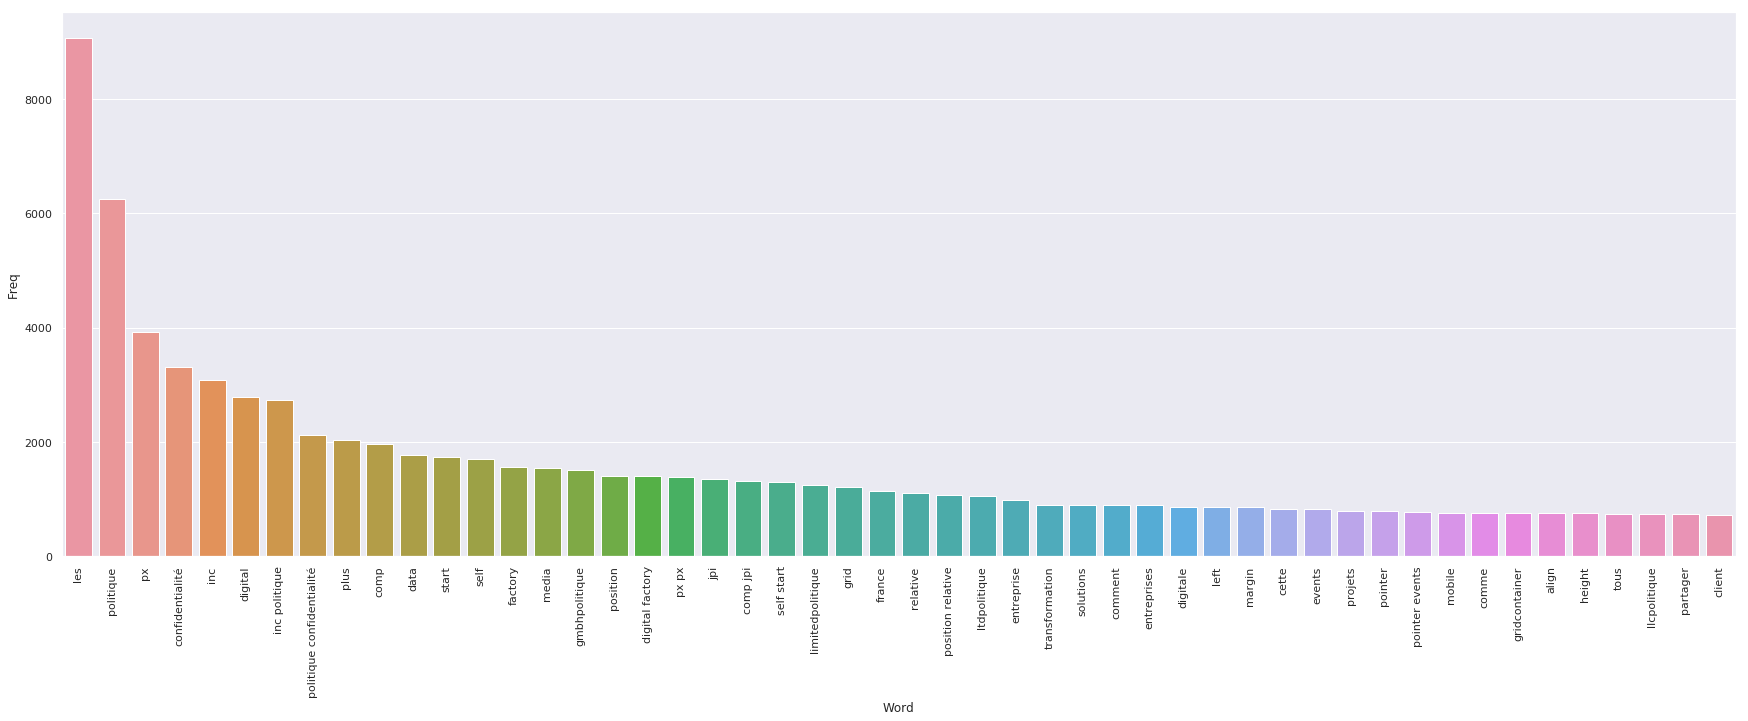

In [14]:
Bigdata=data.X[data.y6==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for outsourcing</h4>

[Text(0, 0, 'les'),
 Text(0, 0, 'management'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'px'),
 Text(0, 0, 'services'),
 Text(0, 0, 'outsourcing'),
 Text(0, 0, 'business'),
 Text(0, 0, 'laplume'),
 Text(0, 0, 'data'),
 Text(0, 0, 'hj'),
 Text(0, 0, 'eb'),
 Text(0, 0, 'hj eb'),
 Text(0, 0, 'mg'),
 Text(0, 0, 'laplume mg'),
 Text(0, 0, 'web'),
 Text(0, 0, 'customer'),
 Text(0, 0, 'btn'),
 Text(0, 0, 'externalisation'),
 Text(0, 0, 'color'),
 Text(0, 0, 'bklyn'),
 Text(0, 0, 'bklyn btn'),
 Text(0, 0, 'solutions'),
 Text(0, 0, 'service'),
 Text(0, 0, 'développement'),
 Text(0, 0, 'clients'),
 Text(0, 0, 'entreprise'),
 Text(0, 0, 'time'),
 Text(0, 0, 'cloud'),
 Text(0, 0, 'equipe'),
 Text(0, 0, 'gestion'),
 Text(0, 0, 'may'),
 Text(0, 0, 'important'),
 Text(0, 0, 'equipe laplume'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'site'),
 Text(0, 0, 'com'),
 Text(0, 0, 'recrutement'),
 Text(0, 0, 'company'),
 Text(0, 0, 'content'),
 Text(0, 0, 'faire'),
 Text(0, 0, 'background'),
 Text(0, 0, 'companies'),
 

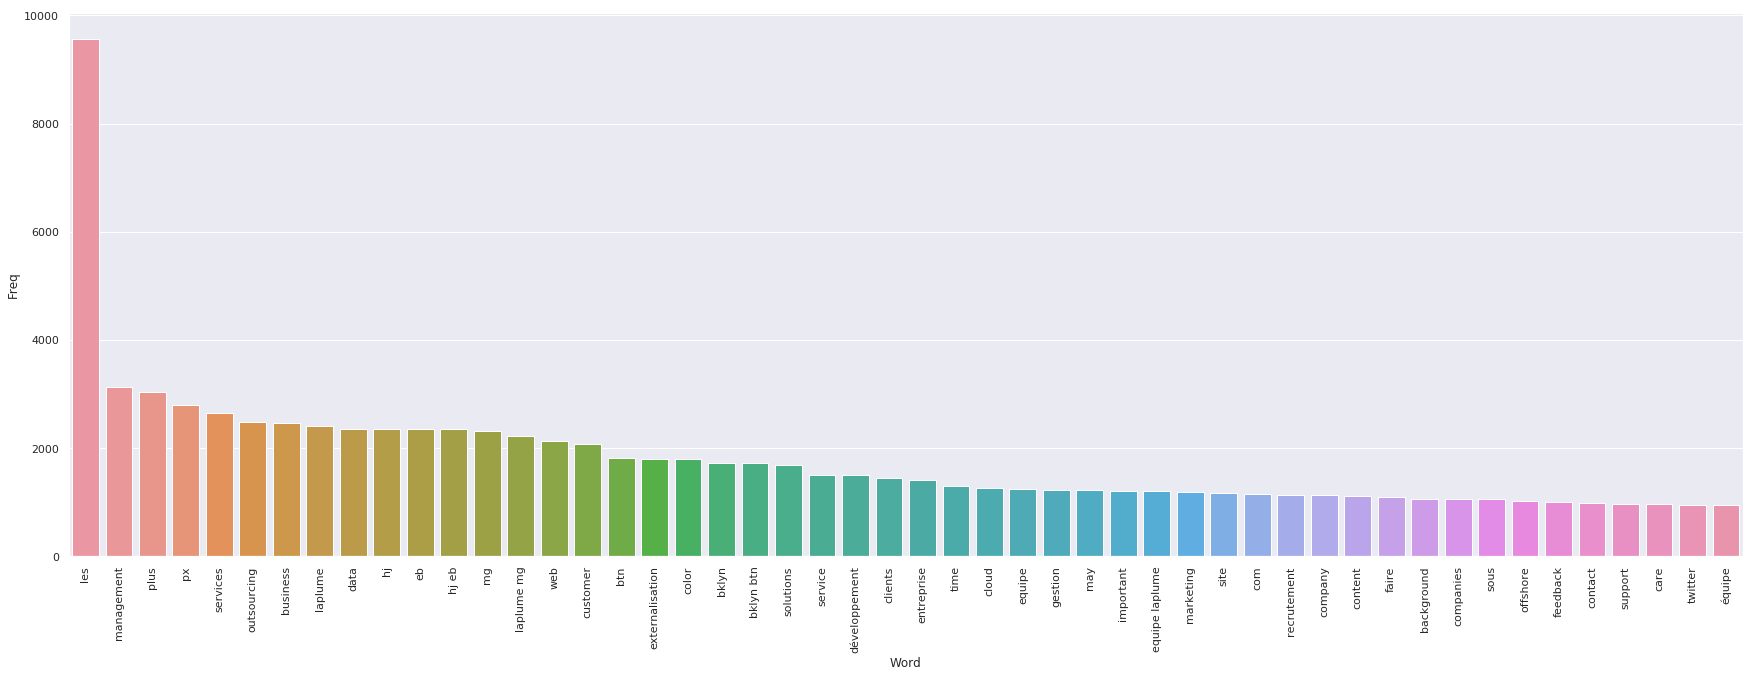

In [15]:
Bigdata=data.X[data.y7==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for mobile</h4>

[Text(0, 0, 'les'),
 Text(0, 0, 'item'),
 Text(0, 0, 'gallery'),
 Text(0, 0, 'gallery item'),
 Text(0, 0, 'pro'),
 Text(0, 0, 'image'),
 Text(0, 0, 'px'),
 Text(0, 0, 'normal'),
 Text(0, 0, 'div'),
 Text(0, 0, 'jumfc'),
 Text(0, 0, 'fullscreen'),
 Text(0, 0, 'pgscl'),
 Text(0, 0, 'image item'),
 Text(0, 0, 'mobile'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'pro gallery'),
 Text(0, 0, 'comp'),
 Text(0, 0, 'item pgscl'),
 Text(0, 0, 'jul'),
 Text(0, 0, 'mylx'),
 Text(0, 0, 'jul mylx'),
 Text(0, 0, 'inline'),
 Text(0, 0, 'styles'),
 Text(0, 0, 'inline styles'),
 Text(0, 0, 'normal normal'),
 Text(0, 0, 'color'),
 Text(0, 0, 'container'),
 Text(0, 0, 'wrapper'),
 Text(0, 0, 'pgi'),
 Text(0, 0, 'div pgi'),
 Text(0, 0, 'jumfc div'),
 Text(0, 0, 'pgscl jumfc'),
 Text(0, 0, 'important'),
 Text(0, 0, 'sans'),
 Text(0, 0, 'gallery inline'),
 Text(0, 0, 'styles gallery'),
 Text(0, 0, 'item container'),
 Text(0, 0, 'comp jumfc'),
 Text(0, 0, 'font'),
 Text(0, 0, 'background'),
 Text(0, 0, 'mylx div'),
 T

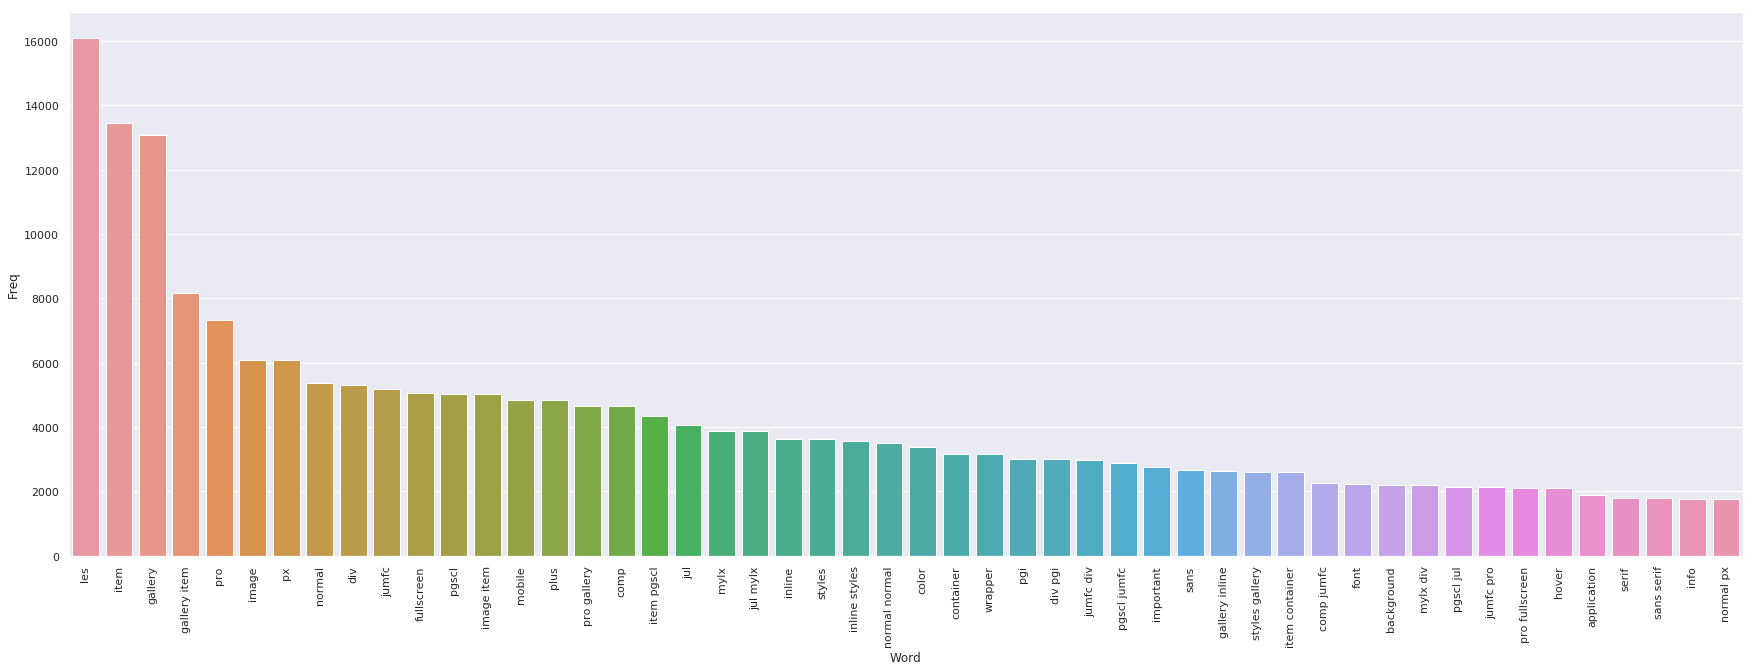

In [16]:
Bigdata=data.X[data.y8==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for omnichannelretail</h4>

[Text(0, 0, 'adobe'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'digital'),
 Text(0, 0, 'customer'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'data'),
 Text(0, 0, 'adobe experience'),
 Text(0, 0, 'content'),
 Text(0, 0, 'transformation'),
 Text(0, 0, 'personalization'),
 Text(0, 0, 'manager'),
 Text(0, 0, 'new'),
 Text(0, 0, 'commerce'),
 Text(0, 0, 'business'),
 Text(0, 0, 'digital transformation'),
 Text(0, 0, 'analytics'),
 Text(0, 0, 'journey'),
 Text(0, 0, 'retail'),
 Text(0, 0, 'cloud'),
 Text(0, 0, 'experience manager'),
 Text(0, 0, 'amazon'),
 Text(0, 0, 'omnichannel'),
 Text(0, 0, 'experiences'),
 Text(0, 0, 'platform'),
 Text(0, 0, 'com'),
 Text(0, 0, 'future'),
 Text(0, 0, 'industry'),
 Text(0, 0, 'technology'),
 Text(0, 0, 'march'),
 Text(0, 0, 'scale'),
 Text(0, 0, 'drive'),
 Text(0, 0, 'using'),
 Text(0, 0, 'see'),
 Text(0, 0, 'first'),
 Text(0, 0, 'time'),
 Text(0, 0, 'leveraging'),
 Text(0, 0, 'personalized'),
 Text(0, 0, 'best'),
 Text(0, 0, 'audience'),
 Text(0, 0, 'tips'),

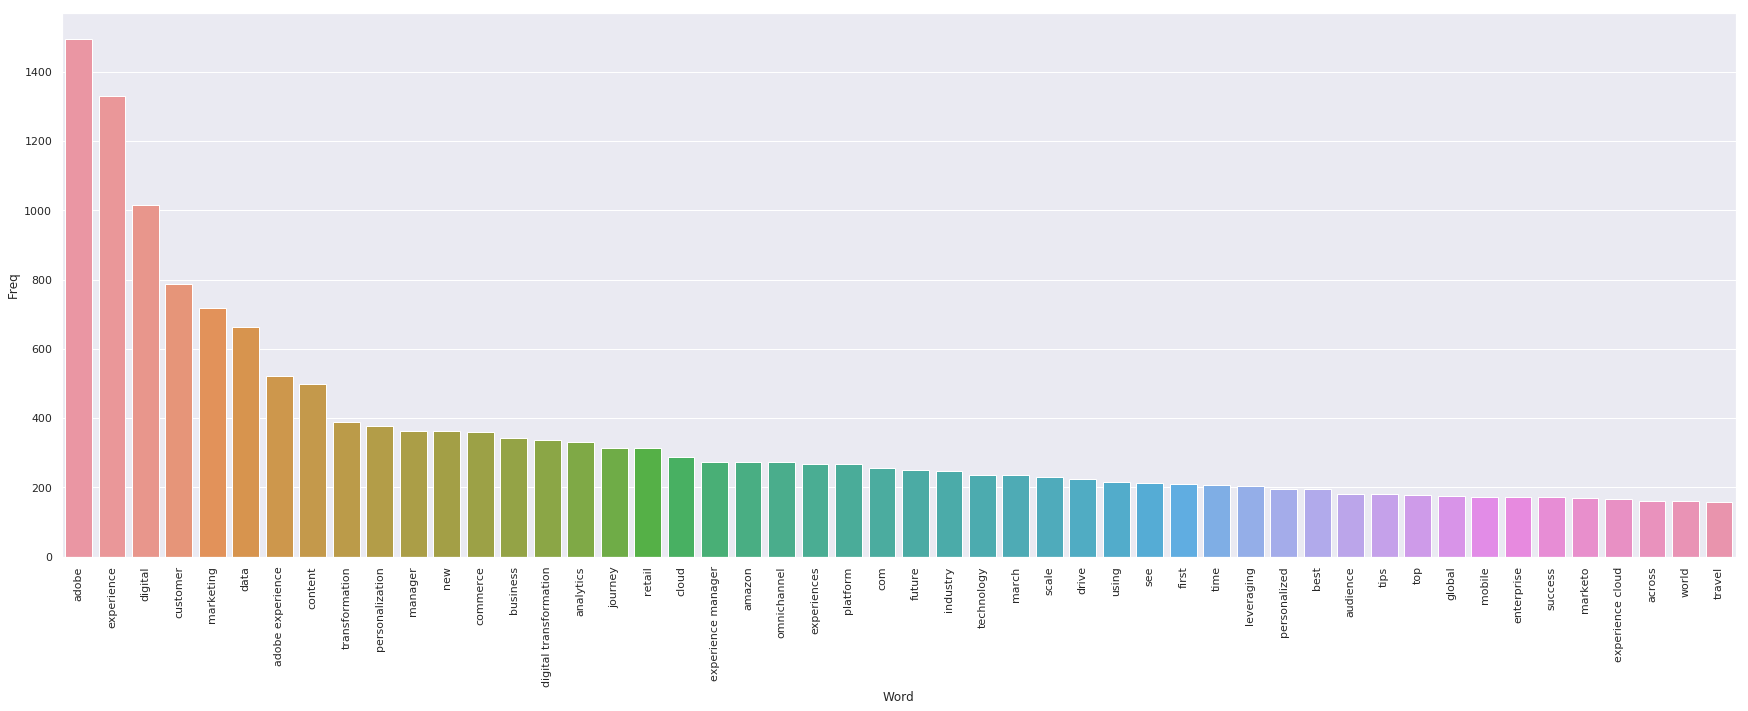

In [17]:
Bigdata=data.X[data.y9==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for iot</h4>

[Text(0, 0, 'les'),
 Text(0, 0, 'ob'),
 Text(0, 0, 'px'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'widget'),
 Text(0, 0, 'ob widget'),
 Text(0, 0, 'ar'),
 Text(0, 0, 'ar ob'),
 Text(0, 0, 'iot'),
 Text(0, 0, 'widget ob'),
 Text(0, 0, 'rec'),
 Text(0, 0, 'données'),
 Text(0, 0, 'objets'),
 Text(0, 0, 'ob rec'),
 Text(0, 0, 'entreprise'),
 Text(0, 0, 'font'),
 Text(0, 0, 'cette'),
 Text(0, 0, 'height'),
 Text(0, 0, 'data'),
 Text(0, 0, 'être'),
 Text(0, 0, 'comment'),
 Text(0, 0, 'width'),
 Text(0, 0, 'comme'),
 Text(0, 0, 'container'),
 Text(0, 0, 'connectés'),
 Text(0, 0, 'tout'),
 Text(0, 0, 'entreprises'),
 Text(0, 0, 'layout'),
 Text(0, 0, 'top'),
 Text(0, 0, 'transformation'),
 Text(0, 0, 'layout ob'),
 Text(0, 0, 'text'),
 Text(0, 0, 'background'),
 Text(0, 0, 'technologies'),
 Text(0, 0, 'height px'),
 Text(0, 0, 'logo'),
 Text(0, 0, 'internet'),
 Text(0, 0, 'smart'),
 Text(0, 0, 'com'),
 Text(0, 0, 'services'),
 Text(0, 0, 'px ar'),
 Text(0, 0, 'box'),
 Text(0, 0, 'px px'),
 Text(0, 0,

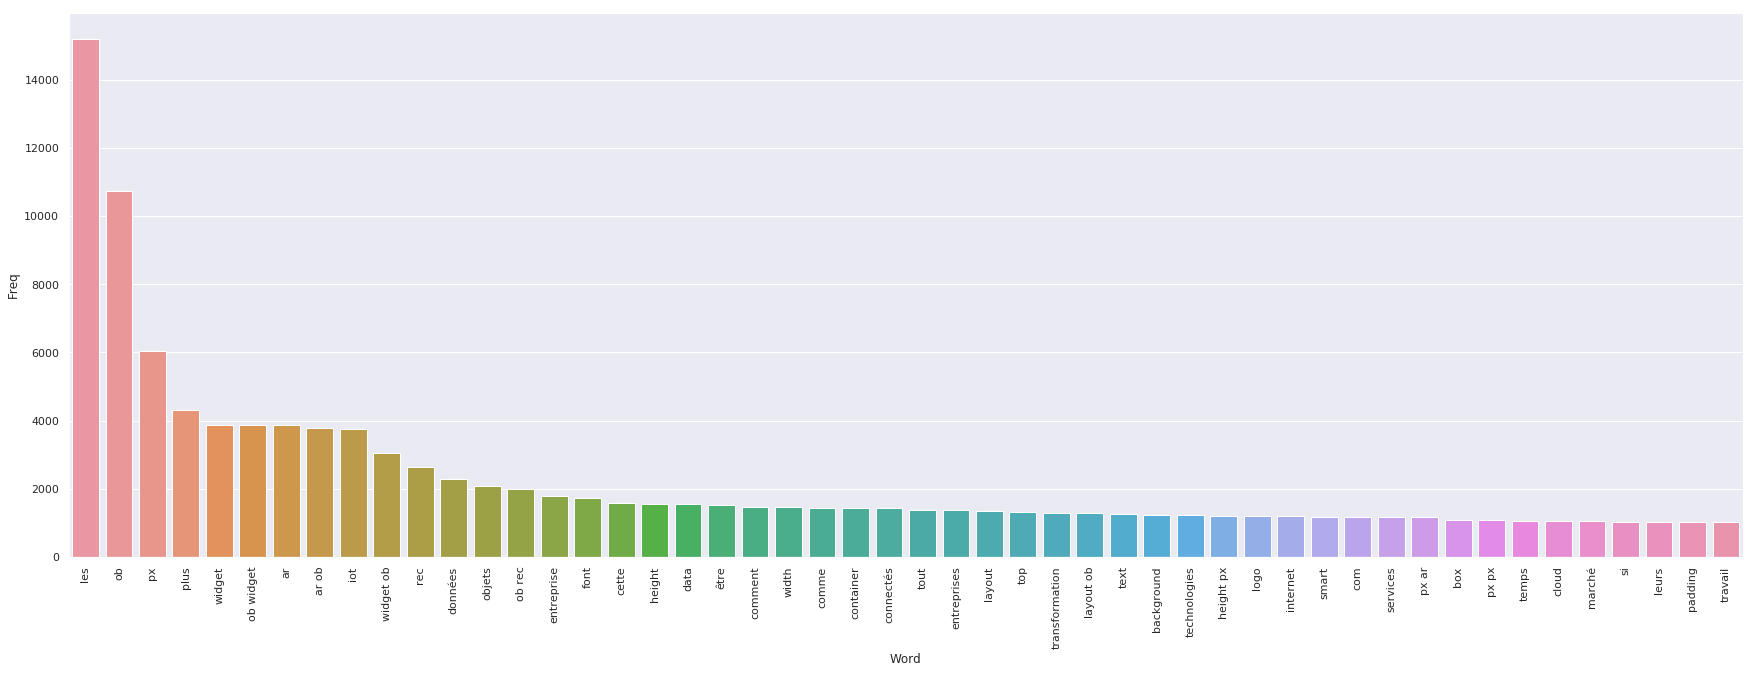

In [18]:
Bigdata=data.X[data.y10==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for projectmanagement</h4>

[Text(0, 0, 'les'),
 Text(0, 0, 'ob'),
 Text(0, 0, 'px'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'widget'),
 Text(0, 0, 'ob widget'),
 Text(0, 0, 'ar'),
 Text(0, 0, 'ar ob'),
 Text(0, 0, 'iot'),
 Text(0, 0, 'widget ob'),
 Text(0, 0, 'rec'),
 Text(0, 0, 'données'),
 Text(0, 0, 'objets'),
 Text(0, 0, 'ob rec'),
 Text(0, 0, 'entreprise'),
 Text(0, 0, 'font'),
 Text(0, 0, 'cette'),
 Text(0, 0, 'height'),
 Text(0, 0, 'data'),
 Text(0, 0, 'être'),
 Text(0, 0, 'comment'),
 Text(0, 0, 'width'),
 Text(0, 0, 'comme'),
 Text(0, 0, 'container'),
 Text(0, 0, 'connectés'),
 Text(0, 0, 'tout'),
 Text(0, 0, 'entreprises'),
 Text(0, 0, 'layout'),
 Text(0, 0, 'top'),
 Text(0, 0, 'transformation'),
 Text(0, 0, 'layout ob'),
 Text(0, 0, 'text'),
 Text(0, 0, 'background'),
 Text(0, 0, 'technologies'),
 Text(0, 0, 'height px'),
 Text(0, 0, 'logo'),
 Text(0, 0, 'internet'),
 Text(0, 0, 'smart'),
 Text(0, 0, 'com'),
 Text(0, 0, 'services'),
 Text(0, 0, 'px ar'),
 Text(0, 0, 'box'),
 Text(0, 0, 'px px'),
 Text(0, 0,

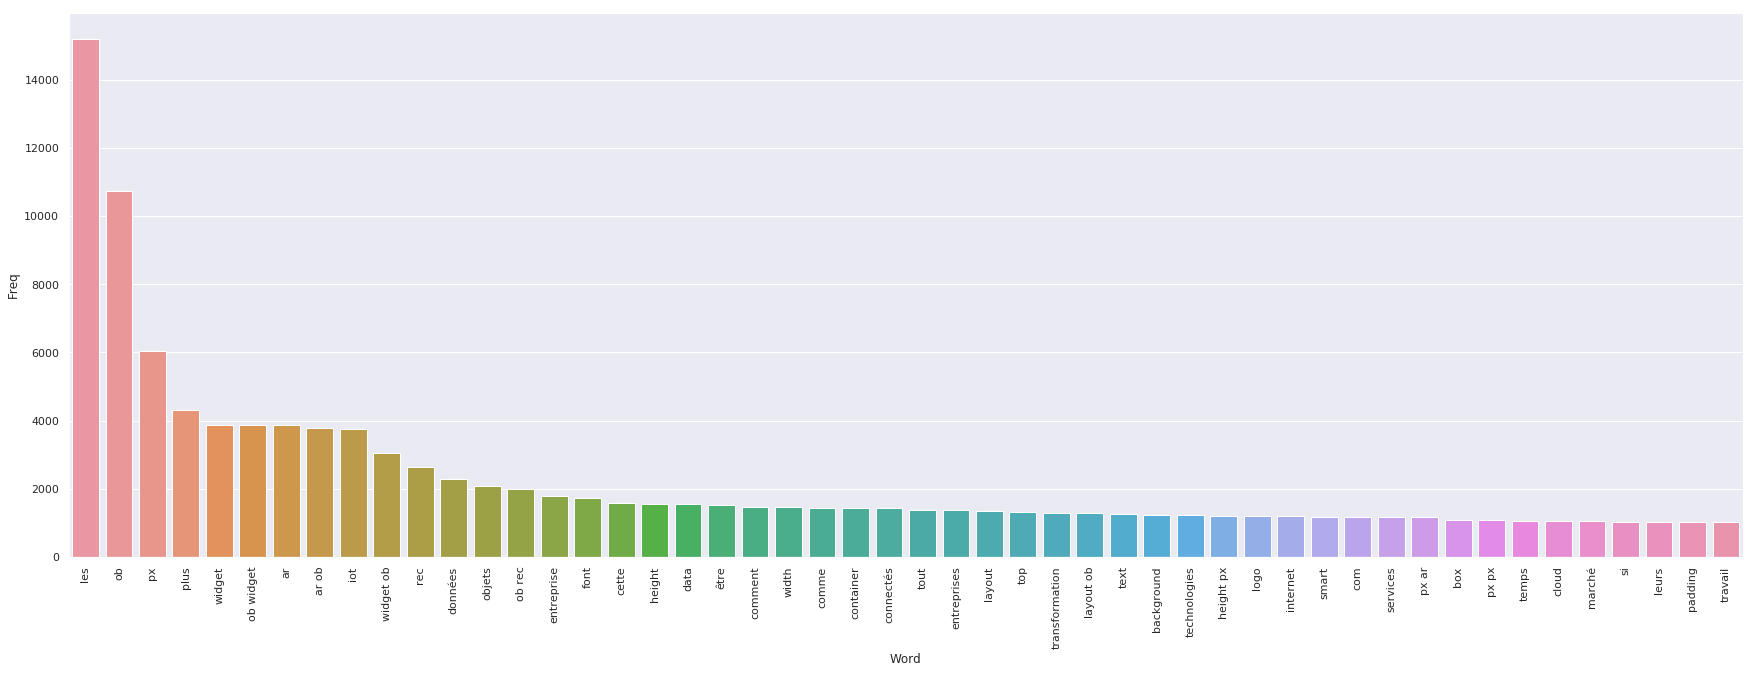

In [19]:
Bigdata=data.X[data.y10==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for startup</h4>

[Text(0, 0, 'font'),
 Text(0, 0, 'none'),
 Text(0, 0, 'les'),
 Text(0, 0, 'inherit'),
 Text(0, 0, 'px'),
 Text(0, 0, 'display'),
 Text(0, 0, 'di'),
 Text(0, 0, 'wistia'),
 Text(0, 0, 'project'),
 Text(0, 0, 'height'),
 Text(0, 0, 'width'),
 Text(0, 0, 'webkit'),
 Text(0, 0, 'family'),
 Text(0, 0, 'font family'),
 Text(0, 0, 'static'),
 Text(0, 0, 'media'),
 Text(0, 0, 'management'),
 Text(0, 0, 'color'),
 Text(0, 0, 'normal'),
 Text(0, 0, 'text'),
 Text(0, 0, 'grid'),
 Text(0, 0, 'min'),
 Text(0, 0, 'max'),
 Text(0, 0, 'box'),
 Text(0, 0, 'position'),
 Text(0, 0, 'projet'),
 Text(0, 0, 'wistia grid'),
 Text(0, 0, 'format'),
 Text(0, 0, 'weight'),
 Text(0, 0, 'font weight'),
 Text(0, 0, 'url'),
 Text(0, 0, 'url static'),
 Text(0, 0, 'static media'),
 Text(0, 0, 'wrapper'),
 Text(0, 0, 'grid wrapper'),
 Text(0, 0, 'gestion'),
 Text(0, 0, 'size'),
 Text(0, 0, 'chrome'),
 Text(0, 0, 'css'),
 Text(0, 0, 'reset'),
 Text(0, 0, 'wistia chrome'),
 Text(0, 0, 'chrome wistia'),
 Text(0, 0, 'css r

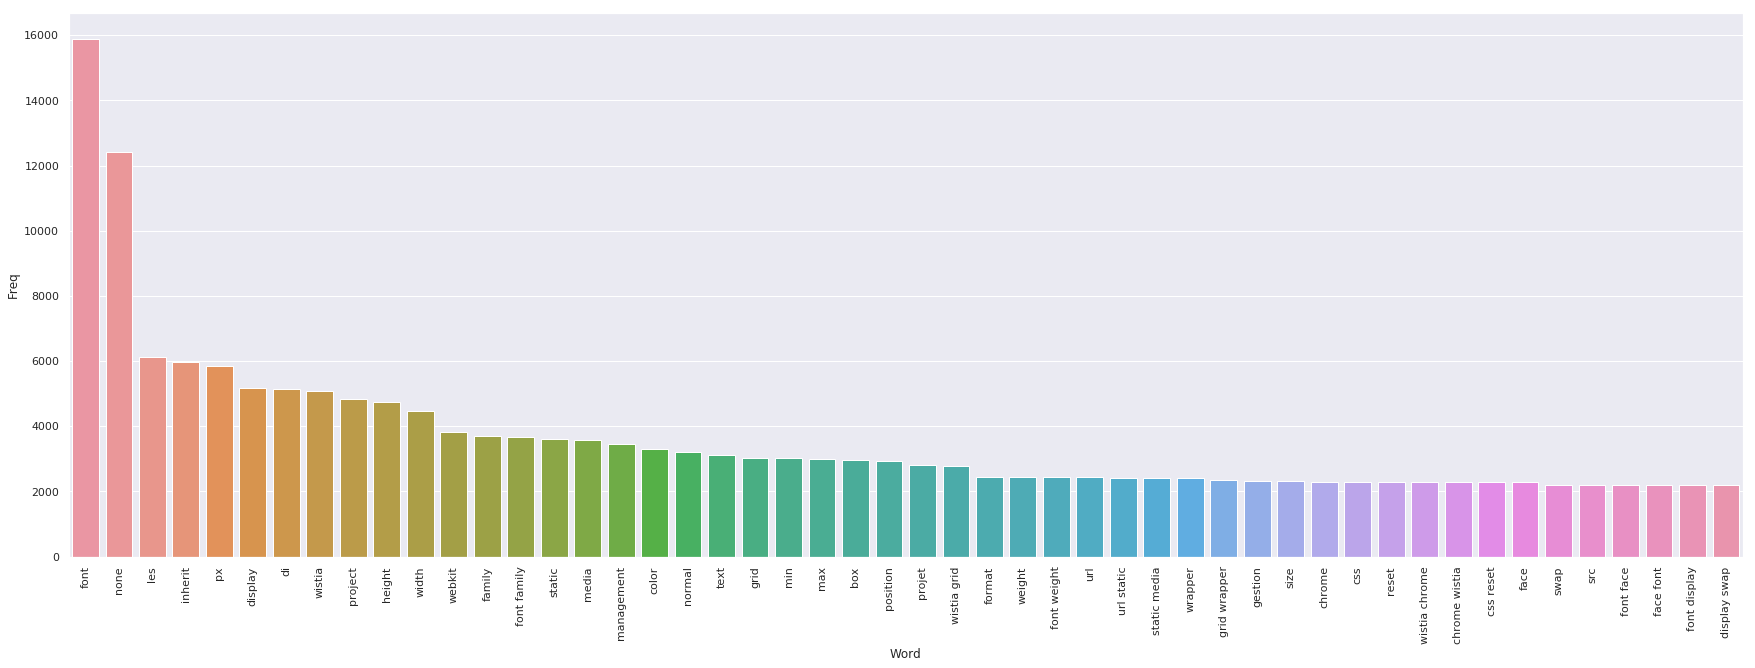

In [20]:
Bigdata=data.X[data.y11==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for transformationdigitale</h4>

[Text(0, 0, 'les'),
 Text(0, 0, 'px'),
 Text(0, 0, 'ob'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'start'),
 Text(0, 0, 'business'),
 Text(0, 0, 'px px'),
 Text(0, 0, 'widget'),
 Text(0, 0, 'ob widget'),
 Text(0, 0, 'self'),
 Text(0, 0, 'france'),
 Text(0, 0, 'position'),
 Text(0, 0, 'self start'),
 Text(0, 0, 'widget ob'),
 Text(0, 0, 'ils'),
 Text(0, 0, 'comp'),
 Text(0, 0, 'entreprise'),
 Text(0, 0, 'margin'),
 Text(0, 0, 'font'),
 Text(0, 0, 'startup'),
 Text(0, 0, 'left'),
 Text(0, 0, 'height'),
 Text(0, 0, 'si'),
 Text(0, 0, 'align'),
 Text(0, 0, 'innovation'),
 Text(0, 0, 'relative'),
 Text(0, 0, 'grid'),
 Text(0, 0, 'position relative'),
 Text(0, 0, 'rec'),
 Text(0, 0, 'entreprises'),
 Text(0, 0, 'paris'),
 Text(0, 0, 'entrepreneurs'),
 Text(0, 0, 'width'),
 Text(0, 0, 'startups'),
 Text(0, 0, 'faire'),
 Text(0, 0, 'container'),
 Text(0, 0, 'tout'),
 Text(0, 0, 'fonds'),
 Text(0, 0, 'color'),
 Text(0, 0, 'projet'),
 Text(0, 0, 'content'),
 Text(0, 0, 'tous'),
 Text(0, 0, 'top'),
 Text

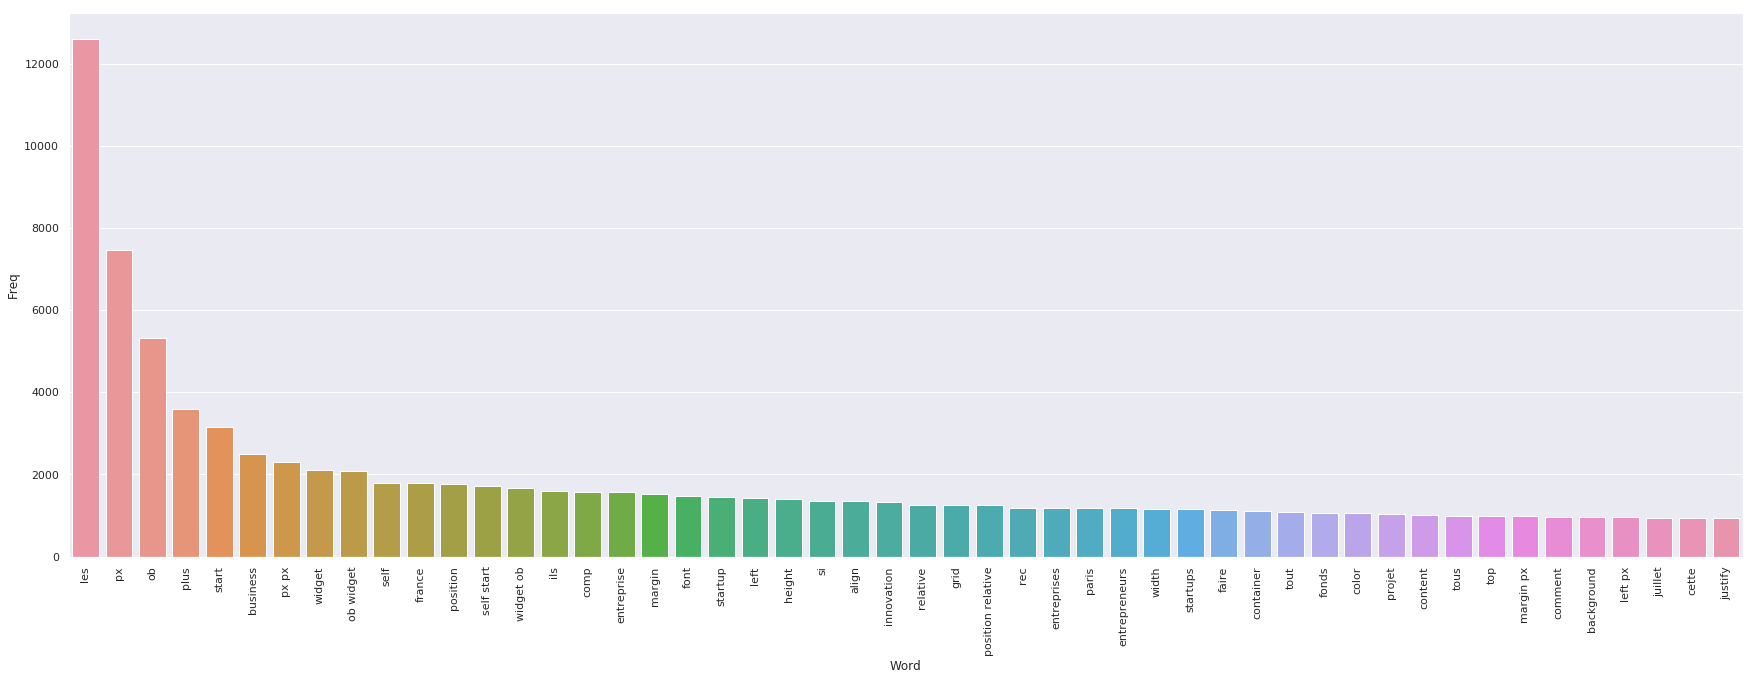

In [21]:
Bigdata=data.X[data.y12==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for agility</h4>

[Text(0, 0, 'gallery'),
 Text(0, 0, 'px'),
 Text(0, 0, 'item'),
 Text(0, 0, 'comp'),
 Text(0, 0, 'gallery item'),
 Text(0, 0, 'pro'),
 Text(0, 0, 'jvrwvvi'),
 Text(0, 0, 'normal'),
 Text(0, 0, 'fullscreen'),
 Text(0, 0, 'les'),
 Text(0, 0, 'pro gallery'),
 Text(0, 0, 'px px'),
 Text(0, 0, 'comp jvrwvvi'),
 Text(0, 0, 'wrapper'),
 Text(0, 0, 'jvrwvvi pro'),
 Text(0, 0, 'inline'),
 Text(0, 0, 'image'),
 Text(0, 0, 'styles'),
 Text(0, 0, 'inline styles'),
 Text(0, 0, 'position'),
 Text(0, 0, 'self'),
 Text(0, 0, 'start'),
 Text(0, 0, 'normal normal'),
 Text(0, 0, 'container'),
 Text(0, 0, 'color'),
 Text(0, 0, 'self start'),
 Text(0, 0, 'div'),
 Text(0, 0, 'grid'),
 Text(0, 0, 'jvrwvvi div'),
 Text(0, 0, 'relative'),
 Text(0, 0, 'position relative'),
 Text(0, 0, 'pgscl'),
 Text(0, 0, 'pgscl jvrwvvi'),
 Text(0, 0, 'image item'),
 Text(0, 0, 'gallery inline'),
 Text(0, 0, 'styles gallery'),
 Text(0, 0, 'item container'),
 Text(0, 0, 'ob'),
 Text(0, 0, 'left'),
 Text(0, 0, 'background'),
 Te

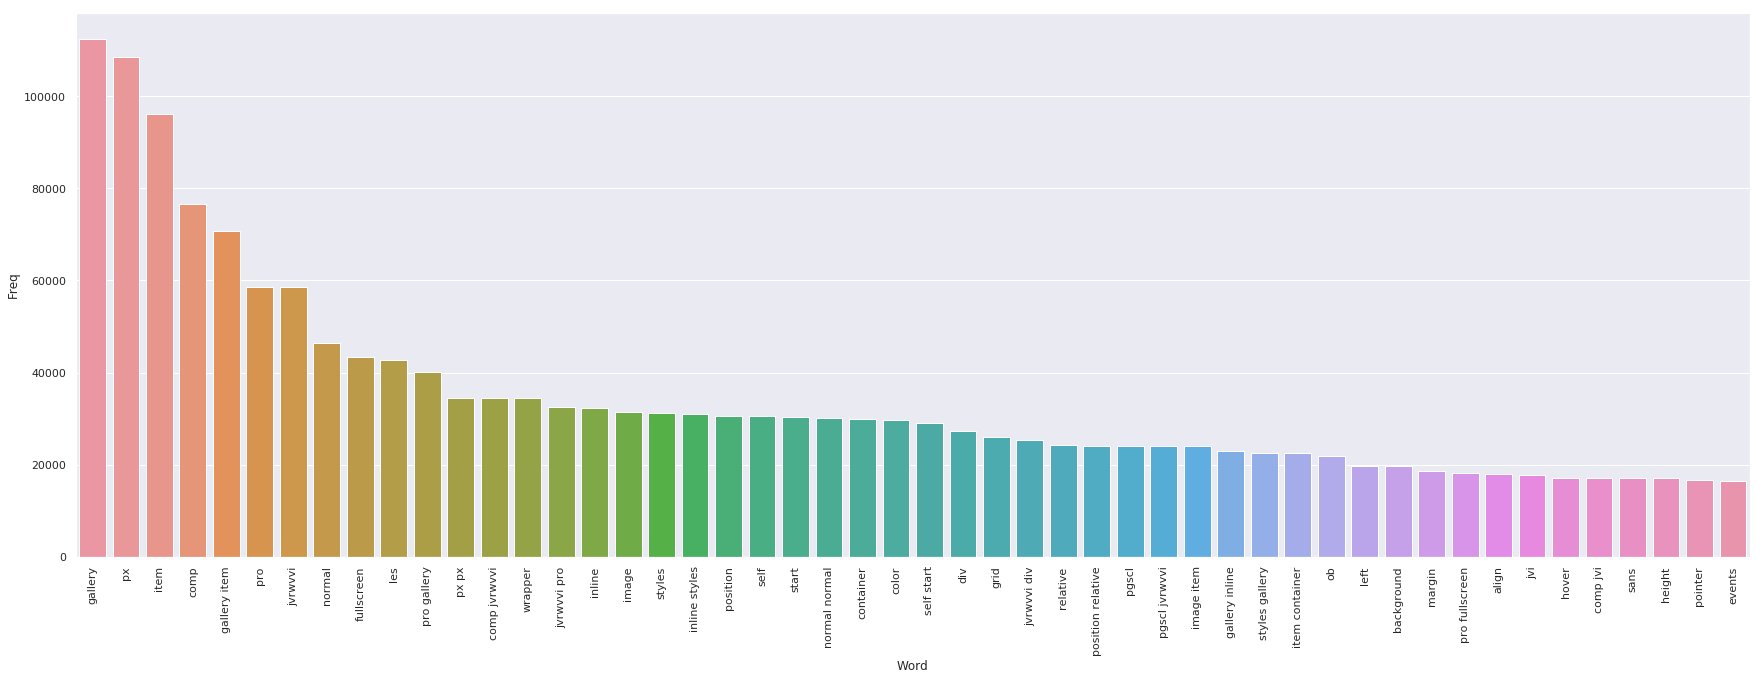

In [22]:
Bigdata=data.X[data.y13==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for transformation_digitale</h4>

[Text(0, 0, 'ob'),
 Text(0, 0, 'les'),
 Text(0, 0, 'px'),
 Text(0, 0, 'widget'),
 Text(0, 0, 'ob widget'),
 Text(0, 0, 'widget ob'),
 Text(0, 0, 'rec'),
 Text(0, 0, 'data'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'sfd'),
 Text(0, 0, 'stp'),
 Text(0, 0, 'sfd stp'),
 Text(0, 0, 'stp ob'),
 Text(0, 0, 'ar'),
 Text(0, 0, 'ob rec'),
 Text(0, 0, 'ar ob'),
 Text(0, 0, 'insurance'),
 Text(0, 0, 'assurance'),
 Text(0, 0, 'font'),
 Text(0, 0, 'height'),
 Text(0, 0, 'container'),
 Text(0, 0, 'width'),
 Text(0, 0, 'top'),
 Text(0, 0, 'logo'),
 Text(0, 0, 'background'),
 Text(0, 0, 'text'),
 Text(0, 0, 'box'),
 Text(0, 0, 'px px'),
 Text(0, 0, 'com'),
 Text(0, 0, 'business'),
 Text(0, 0, 'height px'),
 Text(0, 0, 'padding'),
 Text(0, 0, 'margin'),
 Text(0, 0, 'services'),
 Text(0, 0, 'fintech'),
 Text(0, 0, 'width px'),
 Text(0, 0, 'size'),
 Text(0, 0, 'left'),
 Text(0, 0, 'france'),
 Text(0, 0, 'color'),
 Text(0, 0, 'center'),
 Text(0, 0, 'speaking'),
 Text(0, 0, 'banque'),
 Text(0, 0, 'https'),
 Text(0

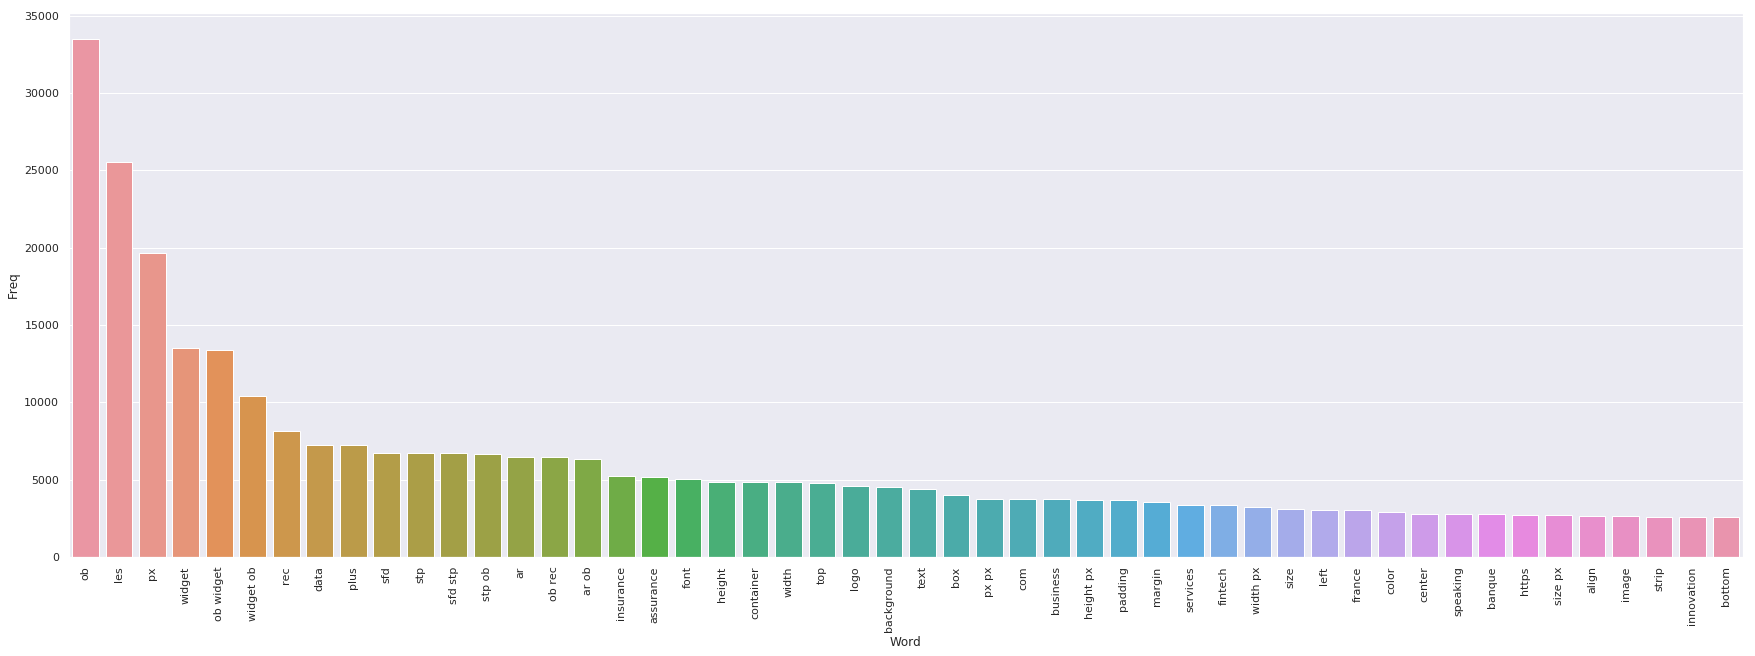

In [23]:
Bigdata=data.X[data.y14==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4>Top Words for vente_distribution</h4>

[Text(0, 0, 'les'),
 Text(0, 0, 'objectifs'),
 Text(0, 0, 'entreprise'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'vente'),
 Text(0, 0, 'commerce'),
 Text(0, 0, 'offre'),
 Text(0, 0, 'starticket'),
 Text(0, 0, 'plus'),
 Text(0, 0, 'publié'),
 Text(0, 0, 'stage'),
 Text(0, 0, 'semaines'),
 Text(0, 0, 'publié semaines'),
 Text(0, 0, 'lire'),
 Text(0, 0, 'bio'),
 Text(0, 0, 'bac'),
 Text(0, 0, 'stage entreprise'),
 Text(0, 0, 'tous'),
 Text(0, 0, 'suite'),
 Text(0, 0, 'offre stage'),
 Text(0, 0, 'lire suite'),
 Text(0, 0, 'tweet'),
 Text(0, 0, 'semaines offre'),
 Text(0, 0, 'commerciale'),
 Text(0, 0, 'les objectifs'),
 Text(0, 0, 'focus'),
 Text(0, 0, 'billets'),
 Text(0, 0, 'smart'),
 Text(0, 0, 'see'),
 Text(0, 0, 'gestionnaire'),
 Text(0, 0, 'unité'),
 Text(0, 0, 'gestionnaire unité'),
 Text(0, 0, 'unité commerciale'),
 Text(0, 0, 'salariés'),
 Text(0, 0, 'commercial'),
 Text(0, 0, 'color'),
 Text(0, 0, 'produits'),
 Text(0, 0, 'px'),
 Text(0, 0, 'suite bac'),
 Text(0, 0, 'link'),
 Te

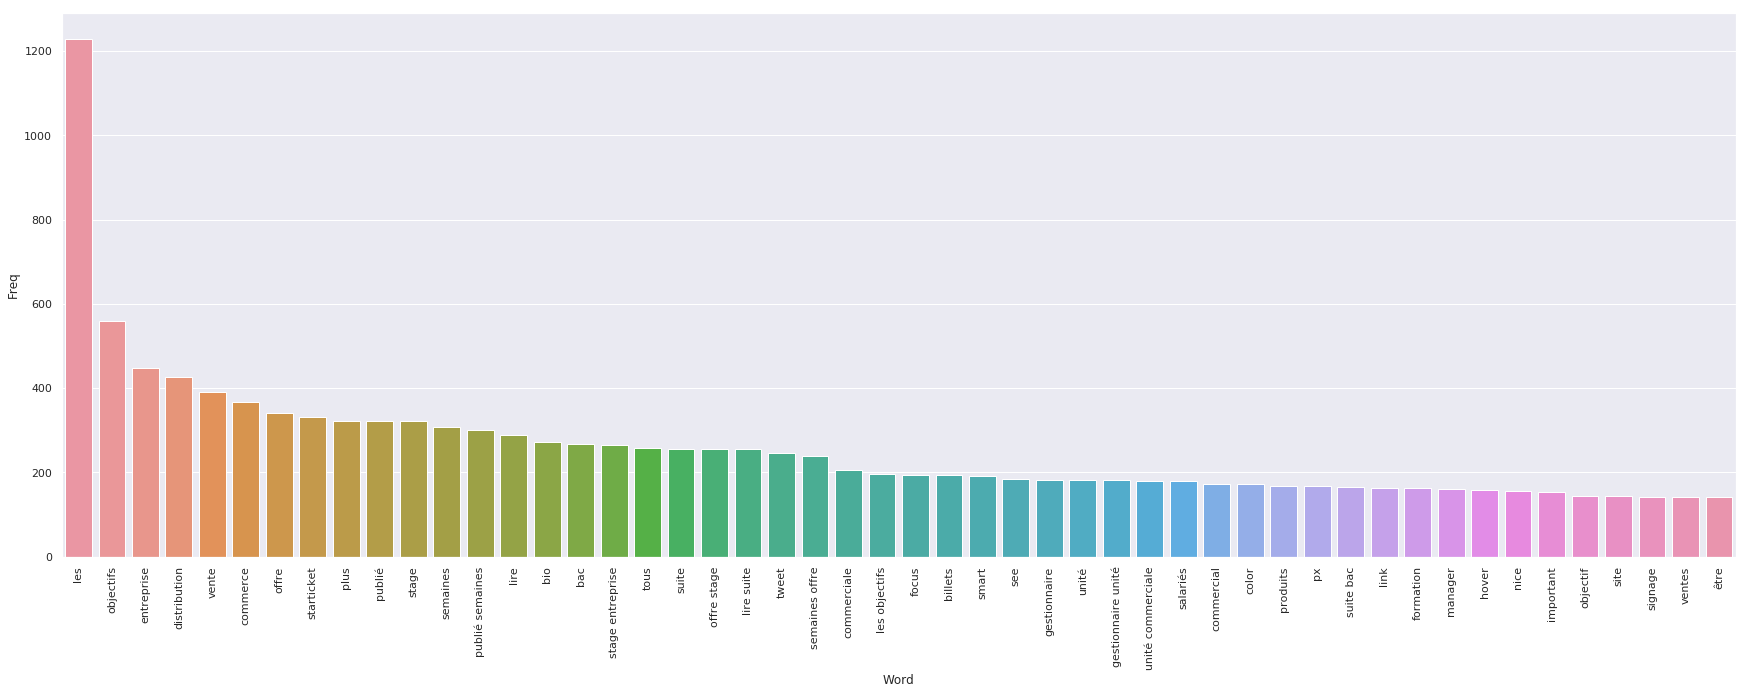

In [24]:
Bigdata=data.X[data.y15==1]


#Convert most freq words to dataframe for plotting bar plot
top_words1 = get_top_n_words(Bigdata, n=50)
top_df = pd.DataFrame(top_words1)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words

g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)